# AWM Level1

We start by importing standard packages.
Notice that *networkx* is used here just for visualization, but AWM does not use it.

In [1]:
import numpy as np
import gym
import networkx as nx

Next, we import our OpenAI gym game.

In [2]:
import agentwebmodel

### Defining a server

We set up a proper *adjacency matrix* for the connections among the files on our webserver.

In [3]:
A = np.zeros((7,7))
A[0,1] = 1; A[0,4] = 1; A[0,5] = 1
A[1,2] = 1; A[1,3] = 1
A[2,0] = 1
A[4,0] = 1; A[4,1] = 1
A[5,6] = 1
A[6,0] = 1

We use *networkx* to show the structure of the files on the webserver, using arbitrary labels

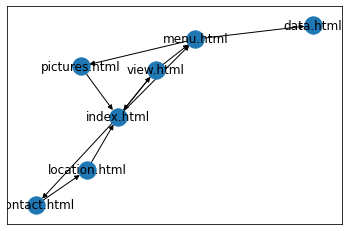

In [4]:
G = nx.from_numpy_matrix(A,create_using=nx.DiGraph)
labels = {0:'index.html',1:'menu.html',2:'pictures.html',3:'data.html',4:'view.html',5:'contact.html',6:'location.html'}
nx.draw_networkx(G,labels=labels)

We instantiate a game with the structure above and a flag in file *view.html*.

In [5]:
env = gym.make('awm_level1-v0',A=A,flag=4)

We reset the environment, and get the first observation corresponding to the only file known to the attacker at the beginning (*index.html*).

In [6]:
observation = env.reset()
print(observation)

[0]


We send an empty command.

In [7]:
env.step({'command': env.CMD_NONE, 'targetfile': 0})

(None, -1, False, {'msg': 'None'})

We receive an empty answer. Notice that the return values of *step()* are: (i) an observation, (ii) a reward, (iii) whether the game has ended, (iv) auxiliary messages.

We check *index.html* (file 0) for a flag.

In [8]:
env.step({'command': env.CMD_SEARCH, 'targetfile': 0})

(False, -1, False, {'msg': 'No flag in file 0'})

No flag here.

We try to check *menu.html* (file 1) for a flag.

In [9]:
env.step({'command': env.CMD_SEARCH, 'targetfile': 1})

AssertionError: Target file not known to the attacker

The request is illegal (because the attacker has no access to this file yet) and it raises an exception.

We then look for links form *index.html* (file 0)

In [10]:
env.step({'command': env.CMD_READ, 'targetfile': 0})

(array([1, 4, 5]), -1, False, {'msg': 'Files connected to file 0'})

We discover links to *menu.html* (file 1), *view.html* (file 4), and *contact.html* (file 5).

We look for more links from *contact.html*.

In [11]:
env.step({'command': env.CMD_READ, 'targetfile': 4})

(array([0, 1]), -1, False, {'msg': 'Files connected to file 4'})

We discover links back to *index.html* (file 0) and to *menu.html* (file 1)

We look for a flag in *contact.html* (file 5).

In [13]:
env.step({'command': env.CMD_SEARCH, 'targetfile': 5})

(False, -1, False, {'msg': 'No flag in file 5'})

No flag here. We try with *view.html* (file 4)

In [15]:
env.step({'command': env.CMD_SEARCH, 'targetfile': 4})

(True, 100, True, {'msg': 'Flag found in file 4'})

Success! We found the flag!